# species2vec Tutorial

This notebook demonstrates how you can generate and explore species2vec embeddings from GBIF data.

In [14]:
import pandas as pd
import numpy as np
import Geohash
import gensim
from tqdm import tqdm
import fasttext
import gensim
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data processing

In [3]:
gbif_data = pd.read_csv("reptilia.csv", delimiter='\t', error_bad_lines=False, usecols=['species', 'decimalLatitude', 'decimalLongitude'])
gbif_data = gbif_data.dropna()
gbif_data.shape

(3693572, 3)

In [4]:
gbif_data.sample(10)

,species,decimalLatitude,decimalLongitude
606751,Gehyra variegata,-32.115120,127.360530
5543921,Thamnophis sirtalis,44.574444,-76.337778
3988142,Tiliqua scincoides,-28.193912,153.270933
1270543,Typhlops pusillus,18.008530,-73.845710
2043672,Typhlops pusillus,19.091490,-69.834950
3681140,Chlamydosaurus kingii,-12.382825,130.858613
2829765,Ctenosaura acanthura,19.191667,-96.141667
5477855,Aspidoscelis velox,35.622945,-105.985615
3277092,Anolis sagrei,25.715306,-80.271182
5422643,Vipera berus,59.053688,10.046000


In [5]:
gbif_data['species'].nunique()

14050

In [6]:
tqdm.pandas(desc="hashing bar")
gbif_data['location_index'] = gbif_data.progress_apply(lambda row: Geohash.encode(row['decimalLatitude'], row['decimalLongitude']), axis=1)
gbif_data.head(15)

hashing bar: 100%|██████████| 3693572/3693572 [03:53<00:00, 15829.94it/s]


,species,decimalLatitude,decimalLongitude,location_index
0,Clemmys guttata,39.533338,-74.686882,dr4bukydms26
1,Pantherophis obsoletus,36.310069,-96.464189,9y7qsfhcmrrq
2,Chelydra serpentina,43.698078,-85.483656,dpg0wfbxy2nh
3,Chelydra serpentina,43.494301,-84.668835,dpez3mfh9jke
4,Lampropeltis triangulum,34.730511,-99.812494,9y1j8dqzbk6p
5,Pantherophis vulpinus,43.404663,-89.322695,dp8qzmt4qreh
6,Sonora semiannulata,34.661278,-98.396494,9y4j0vvued83
7,Chelydra serpentina,43.651459,-84.859203,dpg8kfx2jm8p
8,Pantherophis vulpinus,43.404663,-89.322695,dp8qzmt4qreh
9,Thamnophis sirtalis,43.564470,-84.842509,dpexv6et6mb1


In [7]:
gbif_data = gbif_data.sort_values(by='location_index')
gbif_data.head(15)

,species,decimalLatitude,decimalLongitude,location_index
776055,Procolophon trigoniceps,-85.216700,-177.000000,00f5hqb89pdp
3327984,Palacrodon browni,-85.216667,-177.000000,00f5hqb8cjfh
3325275,Procolophon trigoniceps,-85.216667,-177.000000,00f5hqb8cjfh
3343085,Prolacerta broomi,-85.216667,-177.000000,00f5hqb8cjfh
776056,Procolophon trigoniceps,-85.216700,-175.500000,00g5nqub9xep
3343090,Myosaurus gracilis,-85.216667,-175.500000,00g5nqubctgh
3343092,Prolacerta broomi,-85.216667,-175.500000,00g5nqubctgh
3325274,Procolophon trigoniceps,-85.216667,-175.500000,00g5nqubctgh
3325370,Procolophon trigoniceps,-85.133331,-174.833328,00gettfq2hvg
3343122,Prolacerta broomi,-85.133331,-174.833328,00gettfq2hvg


In [8]:
gbif_data['species'] = gbif_data['species'].str.replace(' ', '_')
result = gbif_data['species'].str.cat(sep=' ')

with open("gbif_data.txt", "w") as text_file:
    text_file.write(result)

## Training

In [9]:
# train model
fasttext.skipgram('gbif_data.txt', 'reptilia')

## Visualisation

In [10]:
m = gensim.models.KeyedVectors.load_word2vec_format('reptilia.vec')

In [11]:
len(m.vocab)

7397

In [15]:
m.most_similar(u'Alligator_mississippiensis')

[(u'Sternotherus_bonevalleyensis', 0.8425856828689575),
 (u'Apalone_ferox', 0.8147842884063721),
 (u'Macrochelys_suwanniensis', 0.8063992261886597),
 (u'Deirochelys_reticularia', 0.7871163487434387),
 (u'Terrapene_putnami', 0.7841686010360718),
 (u'Chelydra_floridana', 0.7829421758651733),
 (u'Alligator_mefferdi', 0.7742743492126465),
 (u'Macrochelys_temminckii', 0.7682404518127441),
 (u'Trachemys_inflata', 0.7563525438308716),
 (u'Deirochelys_carri', 0.755811333656311)]

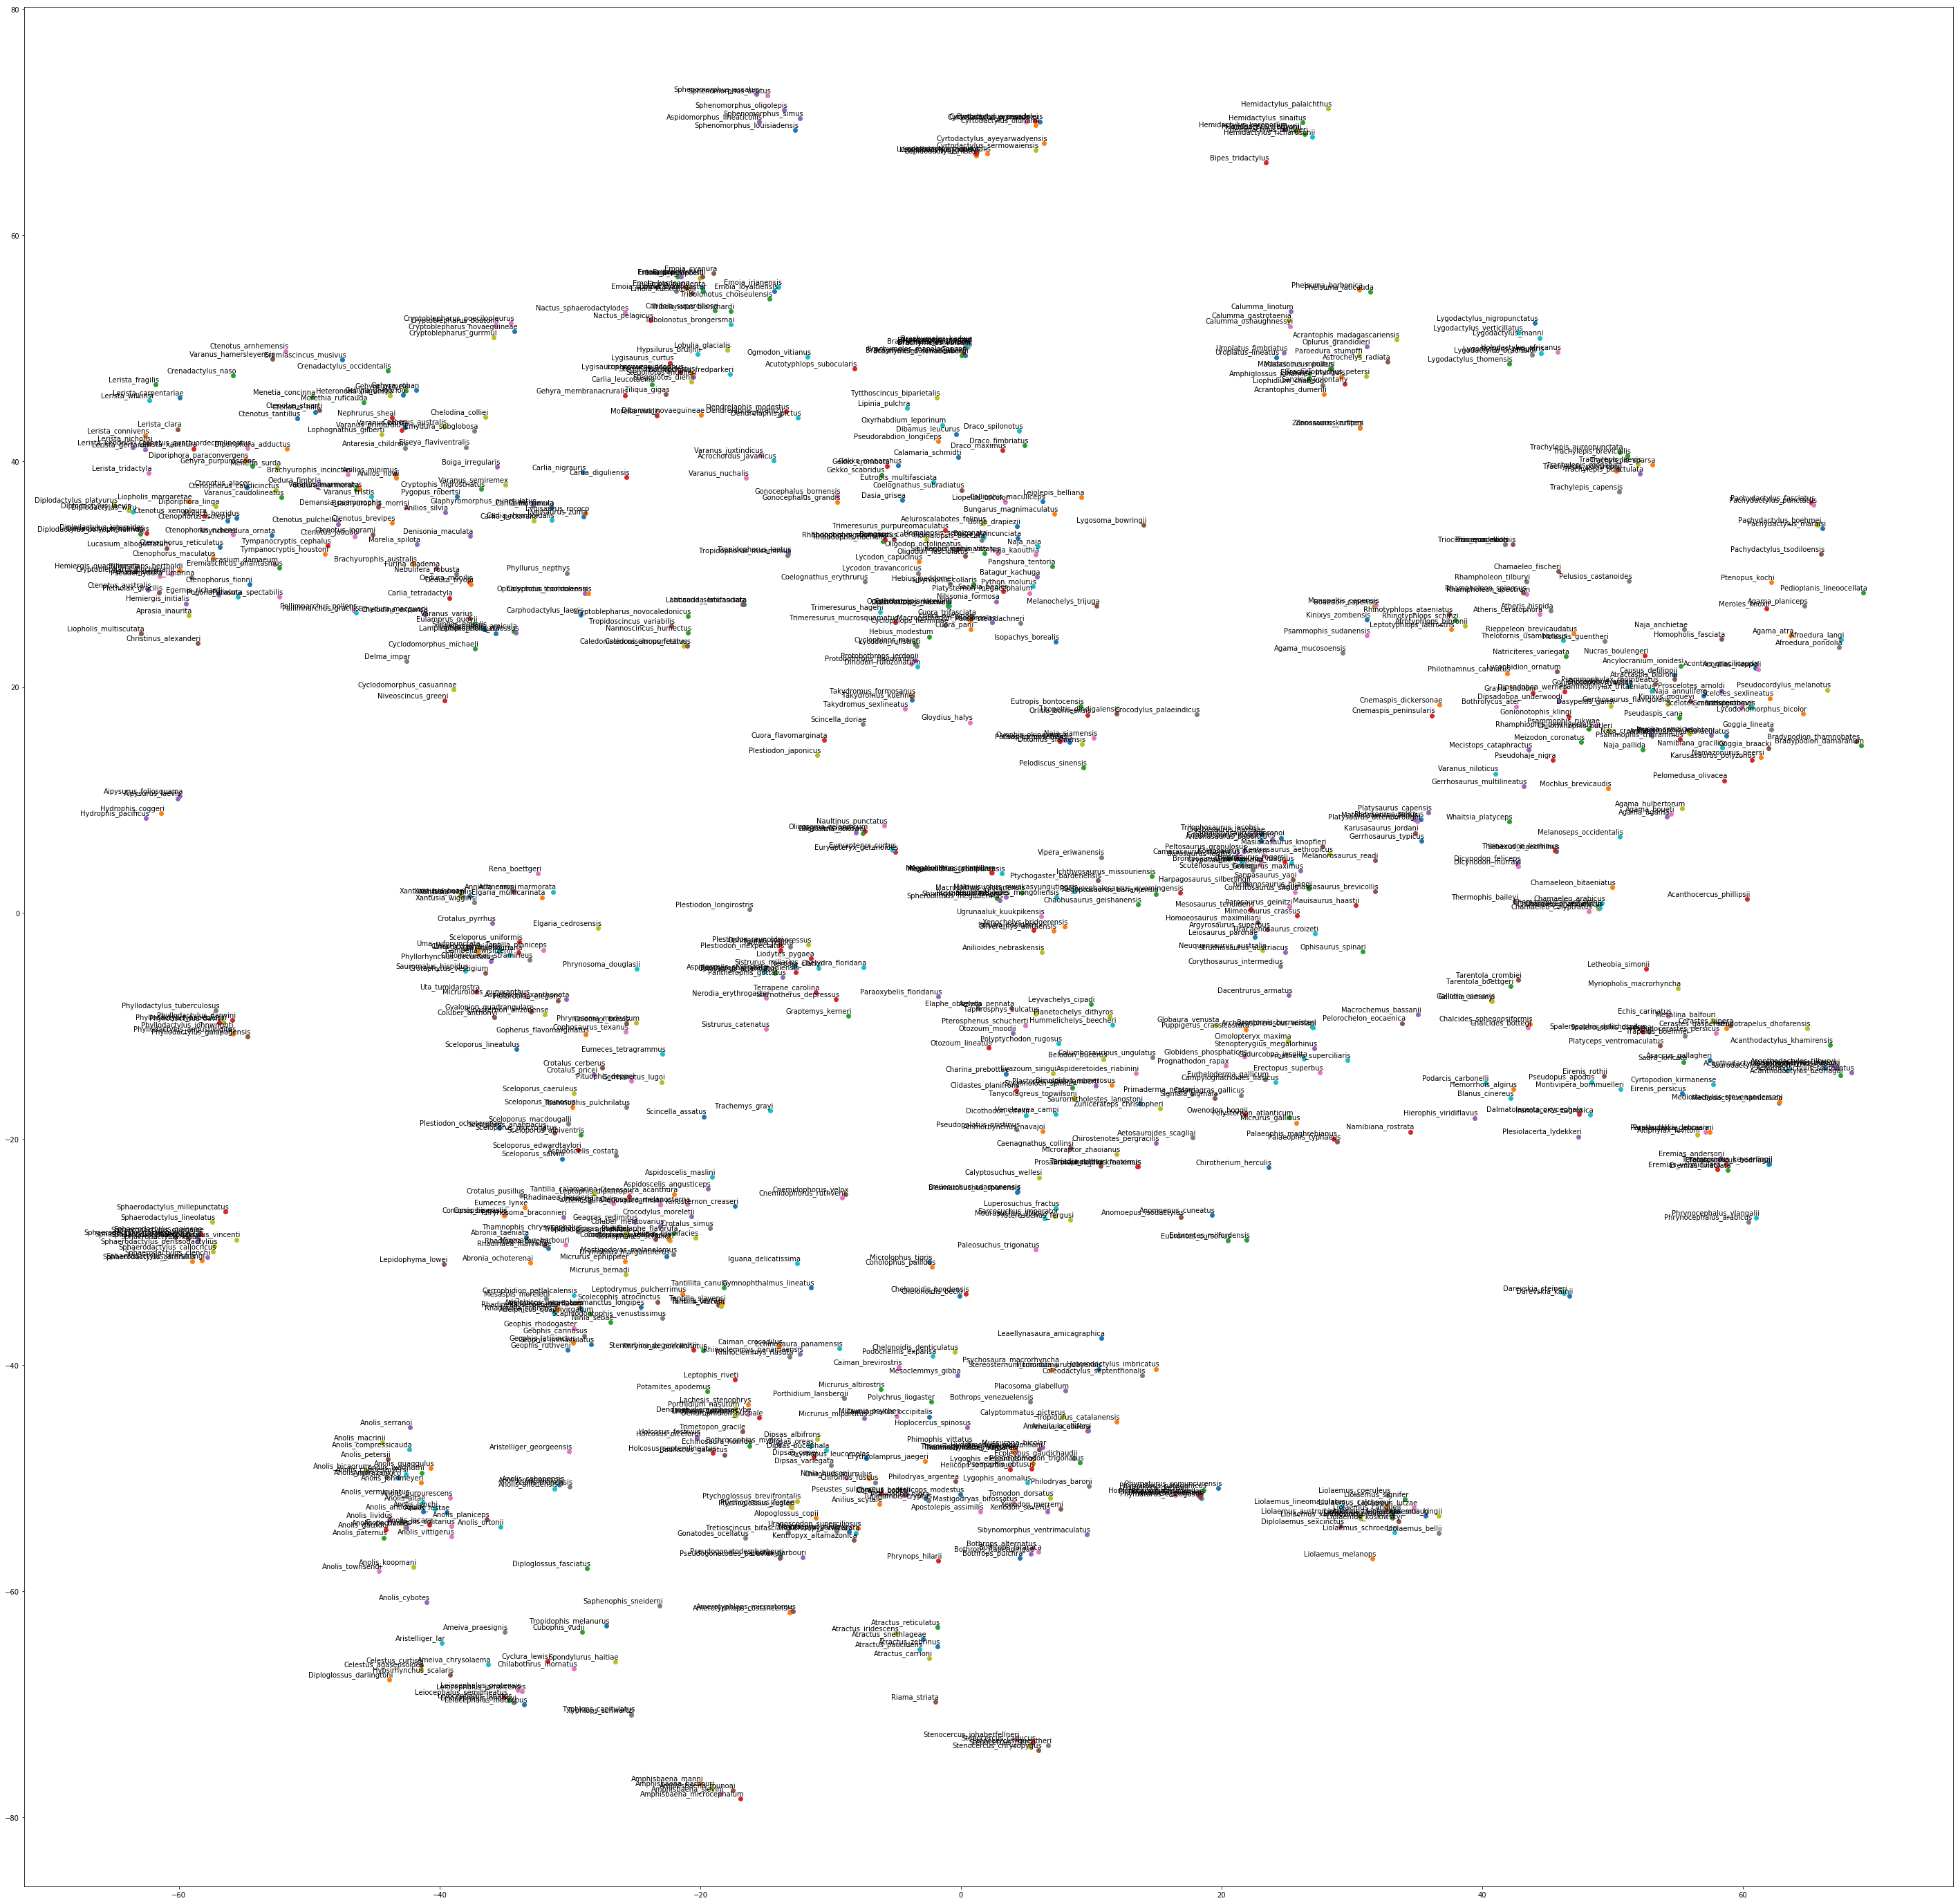

In [16]:
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    # limit visualisation
    # for i in len(model.wv.vocab):
    #     tokens.append(model.wv.vocab)

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    x = x[0:1000]
    y = y[0:1000]
    plt.figure(figsize=(50, 50))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
#     plt.savefig('tsneplot.png')
    plt.show()

tsne_plot(m)